## notes about standard errors, confidence intervals and hypothesis tests

recall the setup of our AB test:

we have a treatment/intervention $ X \in \{0,1\}$ and we have an outcome variable $Y$

it's then very easy to calculate the average of $Y$ for the treatment and control groups and take the difference:

`avg(Y | X = 1) - avg(Y | X = 0)`

this is a measure of association between $X$ and $Y$. If the difference is large and positive -- that is very suggestive and we will WANT to believe that the treatment is the reason why. But when we decompose this simple difference as so:

`avg(Y | X = 1) - avg(Y | X = 0) = avg treatment effect (on the treated) + bias`

we realize we need to be mindful that our results are not due to a systematic difference between treatment and control groups that is unrelated to the treatment.

as we saw, the nice thing about AB tests is that they are designed to eliminate bias through random assignment of $X$

if bias is zero in an AB test, then `avg(Y | X = 1) - avg(Y | X = 0)` is the treatment effect. 

this brings us to a **question**:

if `avg(Y | X = 1) - avg(Y | X = 0)` is the unbiased treatment effect then why did we bother to do a hypothesis test?

****************

## bias vs noise

randomization helps remove bias, but findings can still be misleading due to pure chance, which is called noise.

**bias**: assigning people to treatment/control based on their lifestyle. minors with lots of free time go to the treatment group, and busy working adults to the control group. the treatment group plays more — but they were always going to play more!

**noise**: andy loves cookie cats and schedules gaming sessions for thursdays, but gets sick and can’t play. beatrice rarely plays but starts dating someone who loves cookie cats and plays more because of it.

imagine this randomness for all ~90k participants in the AB test. this is noise.

putting this in terms of our favorite equation:

`avg(Y | X = 1) - avg(Y | X = 0) = avg treatment effect on the treated + bias`

`avg(Y | X = 1) - avg(Y | X = 0) = real avg treatment effect on the treated + noise + bias`

the first equation shows the observed difference includes bias. the second equation shows the observed difference includes the real treatment effect, noise, and bias.


***********

## essential justification for hypothesis testing

we talked about this before, recall:

assume we've used random assignment to push bias down to ~0. and now we want to explain where the variability in the data comes from -- there's really only three options:

**option 1**: all the variability is due to real, systematic effect of the treatment

**option 2**: all the variability is due to randomness (noise) 

**option 3:** the variability is some combination of real effect and noise

it is extremely unlikely **option 1** is true

~~all the variability is due to real, systematic effect of the treatment~~

> so we are left to decide which we believe more: **option 2** or **option 3**

when we use a hypothesis test, what we are "testing" is how much we should believe **option 2**

a very small p-value makes us disinclined to believe it, and more inclined to favor **option 3**

we want to know the true population mean of random variable -- height of men in NYC

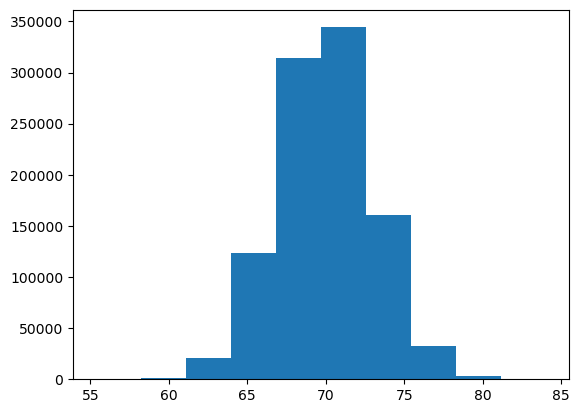

In [4]:
# the sampling distribution of the mean and the central limit theorem
import numpy as np
import matplotlib.pyplot as plt

# in real life we usually don't have access to measurements from the whole population

population_height = np.random.normal(70,3,1000000)

plt.figure()
plt.hist(population_height)
plt.show()

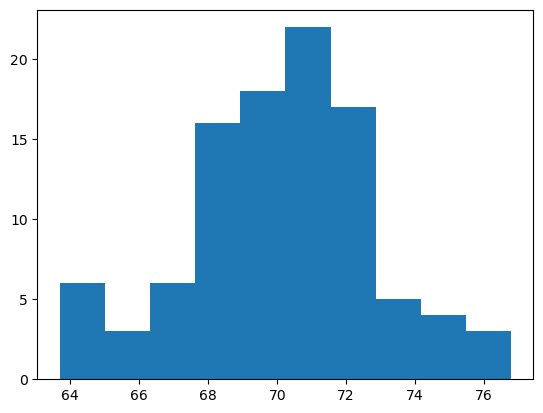

In [5]:
sample_size = 100

random_sample = np.random.choice(population_height,size = sample_size,replace=False)

plt.figure()
plt.hist(random_sample)
plt.show()

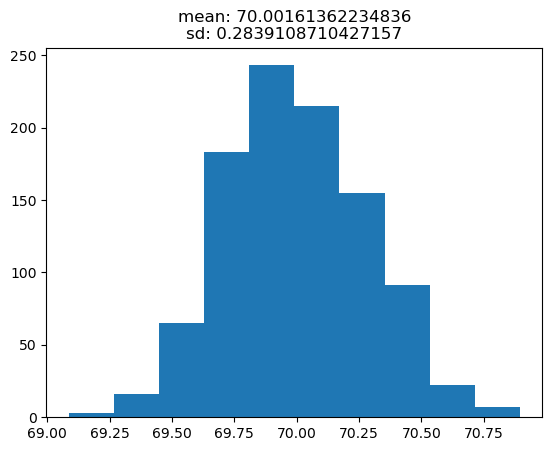

In [7]:
# keep in mind -- we're trying to guess what the real mean of this population is 

# you have many researchers, maybe 1000 independent researchers, each has enough resources/funding, to collect data from 100 people

# we will have 1000 different estimates of the true mean.

# means = [68,71, 70.7,....]

# a histogram of means

# the distribution of the means of the experiments is normal - N(population mean, std/sqrt(n))

# N(70, 3/10)

# central limit theorem -- useful and has many applications

# "sampling distribution of the mean" = "histogram of all the means from your different experiments"

list_of_sample_means = []
for i in range(1000):
    random_sample = np.random.choice(population_height,size = sample_size,replace=False)
    list_of_sample_means.append(random_sample.mean())

plt.figure()
plt.hist(list_of_sample_means)
plt.title(f"mean: {np.array(list_of_sample_means).mean()}\nsd: {np.array(list_of_sample_means).std()}")
plt.show()

$SE = \frac{\sigma}{\sqrt{n}}$

suppose that schools only come in two sizes

big school has 1600 students
small school has 100 students

how do we know a school is good? by the average standardized test score from the school.

suppose we consider a school with an avg of 108 to be "good"

T ~ N(100,80)

researcher has a dataset that looks like this:

| school_id | school_size | avg_test_score

they sort descending on avg_test_score and notice school_size is 100 for the highest avg_test_score values

so small schools are better right?

eh

consider the sampling distribution of the mean for small schools and for big schools.

Big ~ N(100,2)

Small ~ N(100,8)

the small schools are more likely to have a good (high) avg test score

AND

also more likely to have a bad (low) avg test score.



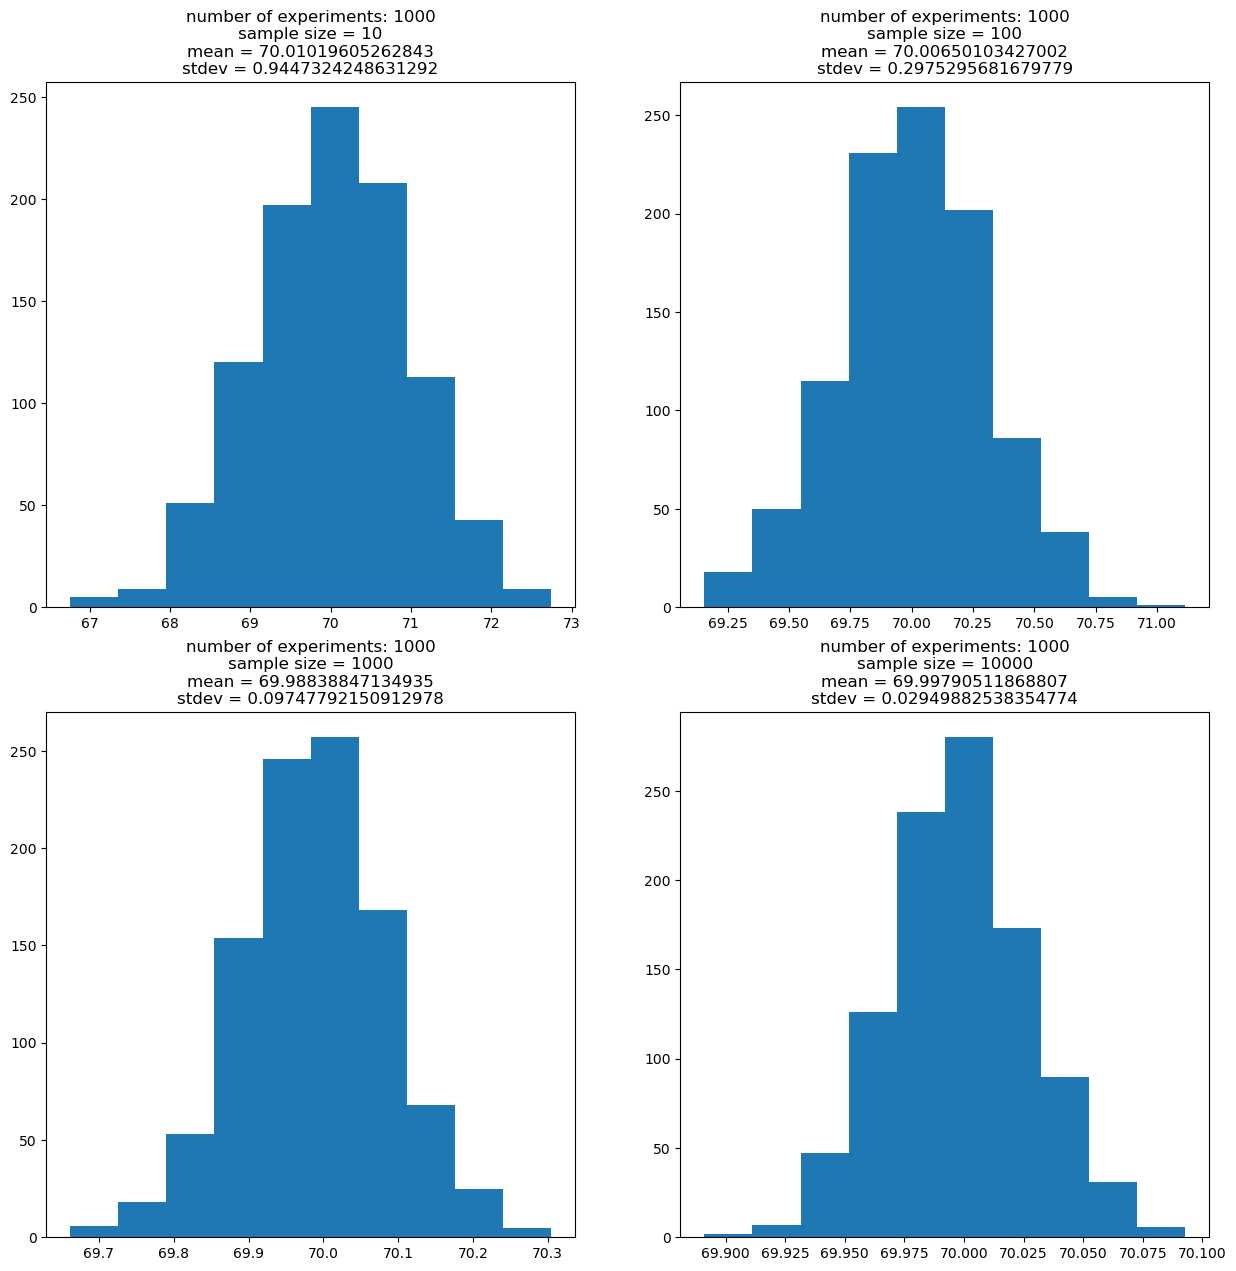

In [8]:

def get_means_from_experiment(sample_size):
    """do 1000 experiments with sample_size number of observations in each"""

    list_of_sample_means = []
    for i in range(1000):
        random_sample = np.random.choice(population_height,size = sample_size)
        list_of_sample_means.append(random_sample.mean())

    return list_of_sample_means



plt.subplots(2,2,figsize = (15,15))

for i, size in enumerate([10,100,1000,10000]):

    list_of_sample_means_for_size = get_means_from_experiment(size)
    mean_for_sample_size = np.array(list_of_sample_means_for_size).mean()
    std_for_sample_size = np.array(list_of_sample_means_for_size).std()

    plt.subplot(2,2,i + 1)
    plt.hist(list_of_sample_means_for_size)
    plt.title(f"number of experiments: {1000}\nsample size = {size}\nmean = {mean_for_sample_size}\nstdev = {std_for_sample_size}")


plt.show()

In [29]:
import scipy.stats as stats

# how to calculate confidence intervals

# we send out our first researcher - and they come back with 100 data points

# we want to build a confidence interval for our estimate of the population mean

def ci_for_sample_mean(sample_size,alpha):
    # the researcher giving us the data
    random_sample = np.random.choice(population_height,size=sample_size)

    # calculate the mean and std
    sample_mean = random_sample.mean()
    sample_std = random_sample.std()

    # std/sqrt(n)
    se = sample_std/np.sqrt(sample_size)

    # get the "critical value"
    # e.g. alpha = .05 -> 95% confidence interval -> z = 2
    def z_alpha(alpha):
        x = 1 - alpha / 2
        return stats.norm.ppf(x)

    ci = z_alpha(.05)*se

    return (sample_mean - ci,sample_mean + ci)

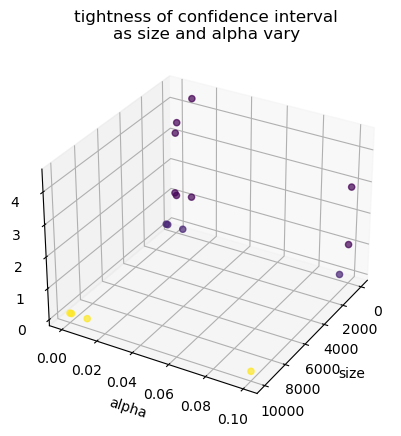

In [64]:
from itertools import product
import pandas as pd

size_alpha_combos = list(product([10,100,1000,10000],[.1,.01,.001,.0001]))
confidence_intervals = [ci_for_sample_mean(size,alpha) for size,alpha in size_alpha_combos]

lower, upper = zip(*confidence_intervals)
size, alpha = zip(*size_alpha_combos)
ci_df = pd.DataFrame([lower,upper,size,alpha]).T
ci_df['diff'] = ci_df[1] - ci_df[0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ci_df[2], ci_df[3], ci_df['diff'],c = ci_df[2],cmap = 'viridis',alpha = .7)
ax.set_xlabel('size')
ax.set_ylabel('alpha')
ax.set_zlabel('upper - lower')
ax.set_title('tightness of confidence interval\nas size and alpha vary')
ax.view_init(elev=30, azim=30)